# Ejercicio Python de K-means
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

Como ejemplo utilizaremos de entradas un conjunto de datos que obtuve de un proyecto propio, en
el que se analizaban rasgos de la personalidad de usuarios de Twitter. He filtrado a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología
conocida como “Ocean: The Big Five” tendemos como características de entrada:  
- usuario (el nombre en Twitter)
- “op” = Openness to experience - grado de apertura mental a nuevas experiencias, curiosidad,
arte
- “co” =Conscientiousness - grado de orden, prolijidad, organización
- “ex” = Extraversion - grado de timidez, solitario o participación ante el grupo social
- “ag” = Agreeableness - grado de empatía con los demás, temperamento
- “ne” = Neuroticism, - grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- Wordcount - Cantidad promedio de palabras usadas en sus tweets
- Categoria - Actividad laboral del usuario (actor, cantante, etc.)

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no,
por sus similitudes en la personalidad. Si bien tenemos 8 columnas de entrada, sólo utilizaremos 3
en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los
grupos resultantes. Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos.
Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida”
(y así con cada rubro laboral). Pues veremos si lo probamos, o por el contrario, los grupos no están
relacionados necesariamente con la actividad de estas Celebridades.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Cargamos los datos de entrada del archivo csv

In [4]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [19]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [20]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Las categorias son: 1-actores 2-cantantes 3-modelo 4-TV 5-radio 6-tecnologÃ­a 7-deportes 8-politica 9-escritor

## Visualizamos los datos

C:\Windows\Temp\ipykernel_8140\928770594.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


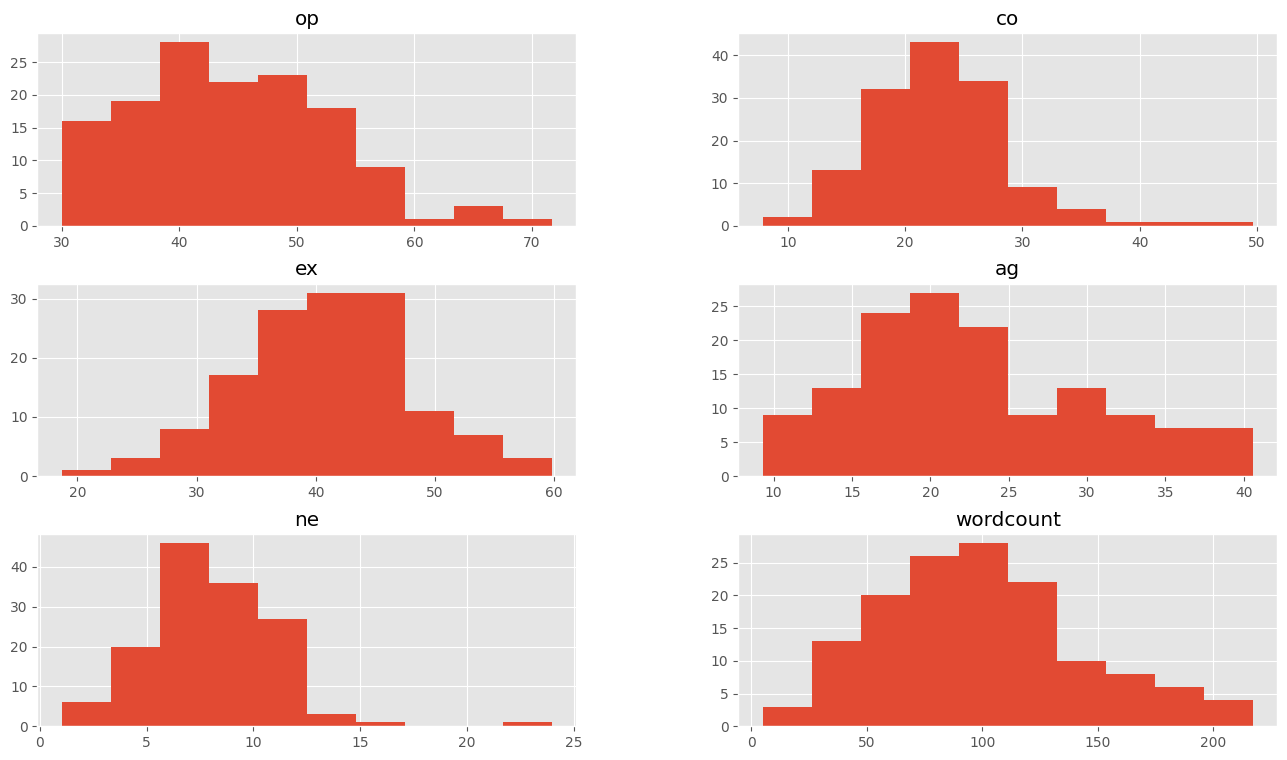

In [21]:
dataframe.drop(['categoria'],1).hist()
plt.show()

C:\Users\noroot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


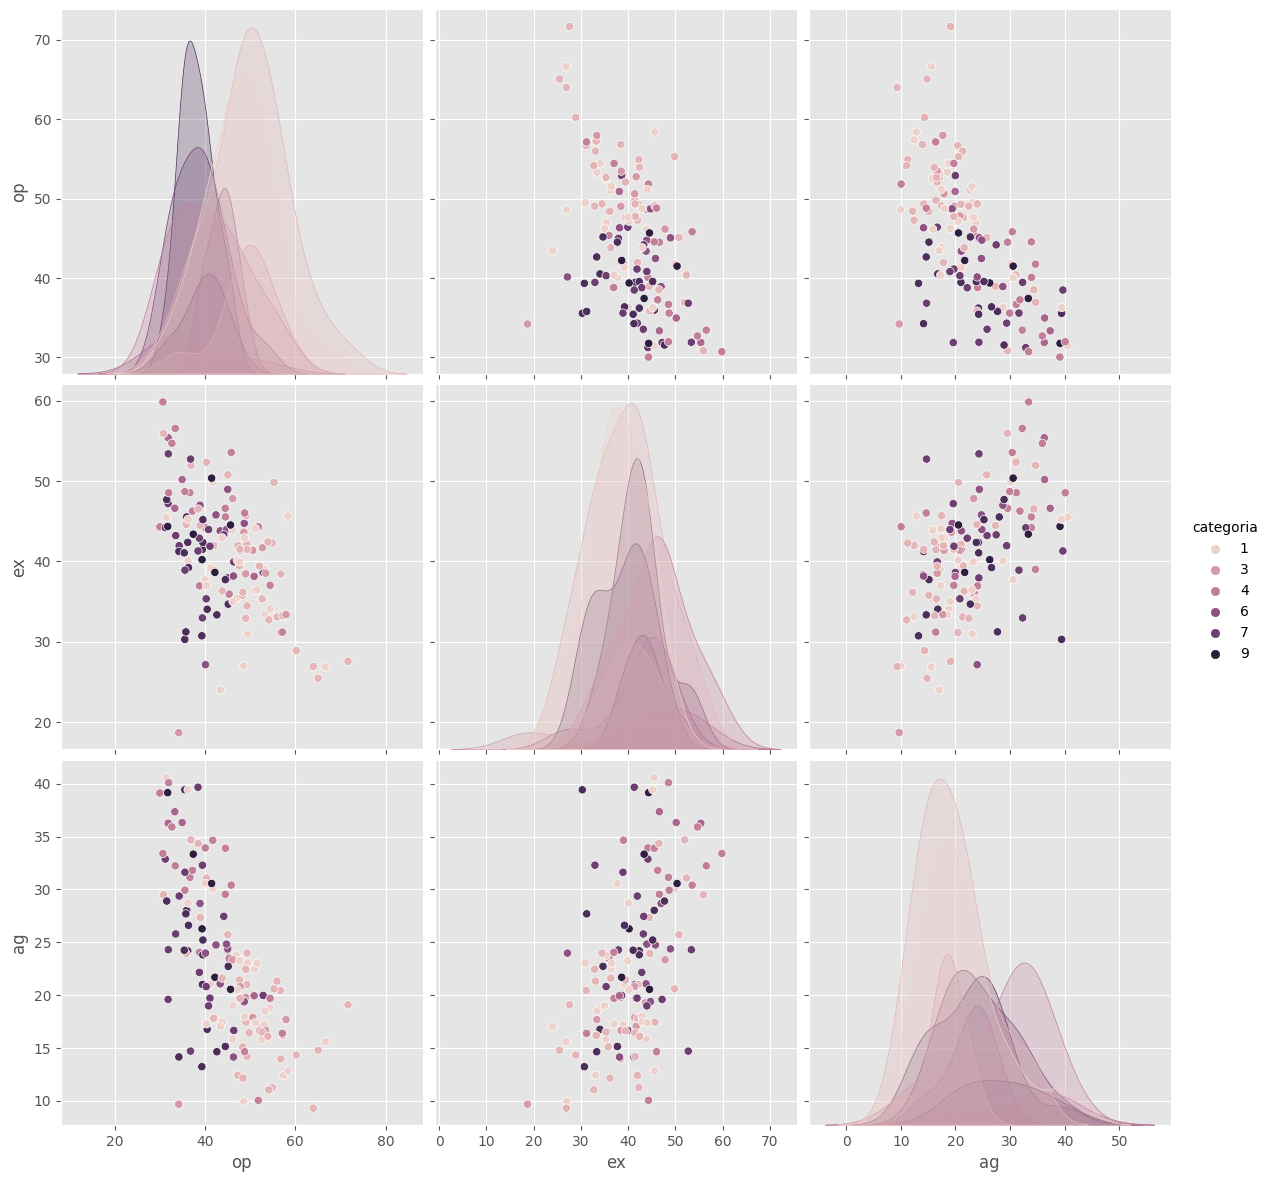

In [22]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

## Creamos el modelo

In [23]:
#Para el ejercicio, sÃ³lo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

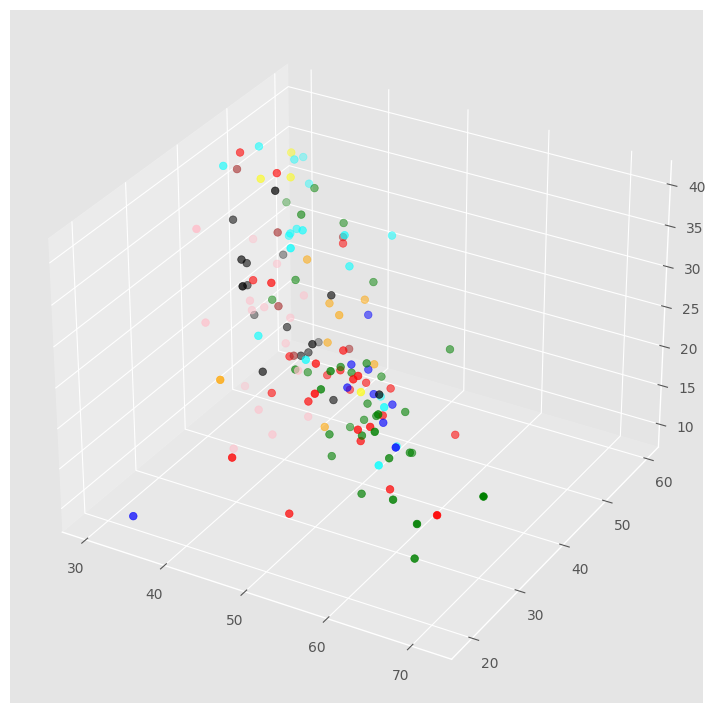

In [44]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(projection='3d')
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
# Definimos los datos de prueba
asignar=[]
for row in y:
    asignar.append(colores[row])
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=30)
plt.show()

# Buscamos el valor K

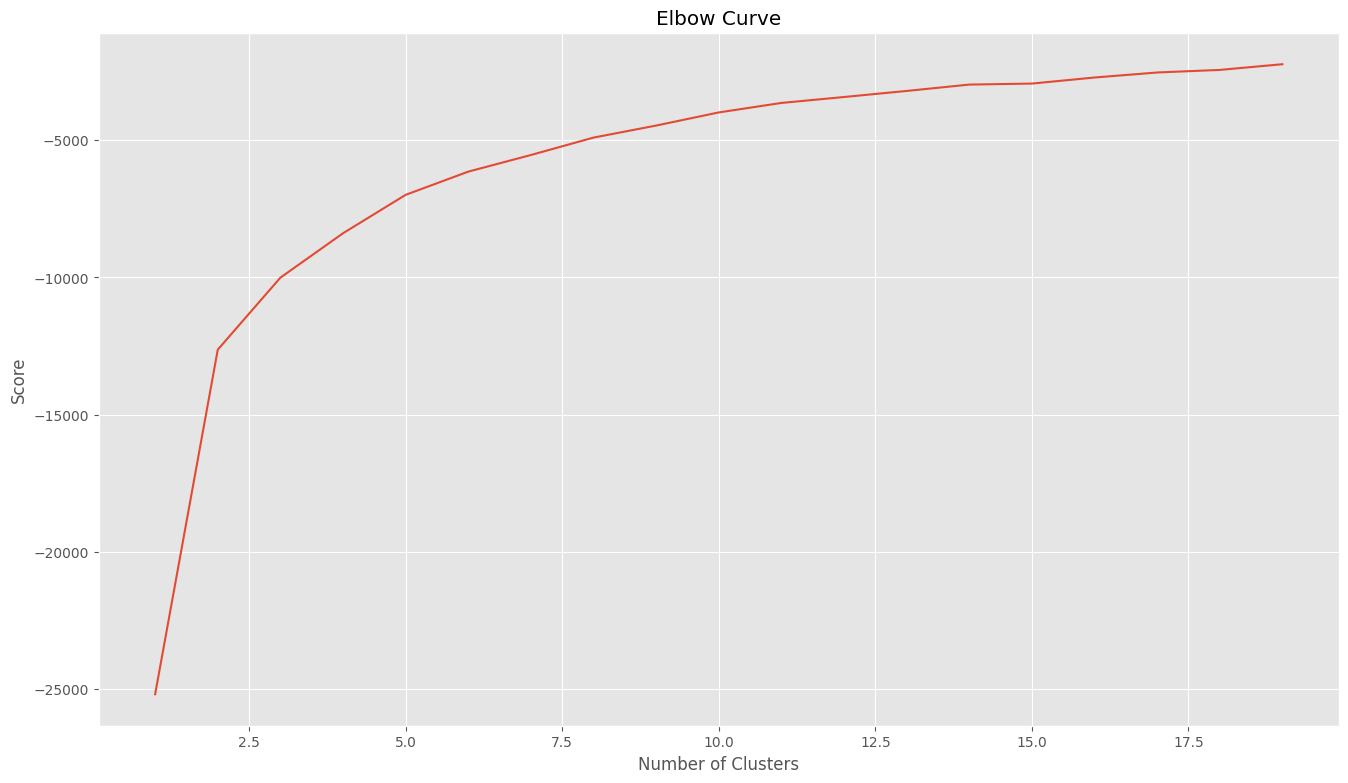

In [46]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [47]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podrá ser otro.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[49.85887044 41.15660338 17.54193885]
 [35.39154169 47.17372597 34.50044186]
 [39.55874337 44.81190669 24.291027  ]
 [42.66891482 33.31008136 21.11530482]
 [57.92200861 31.5039735  15.67199517]]


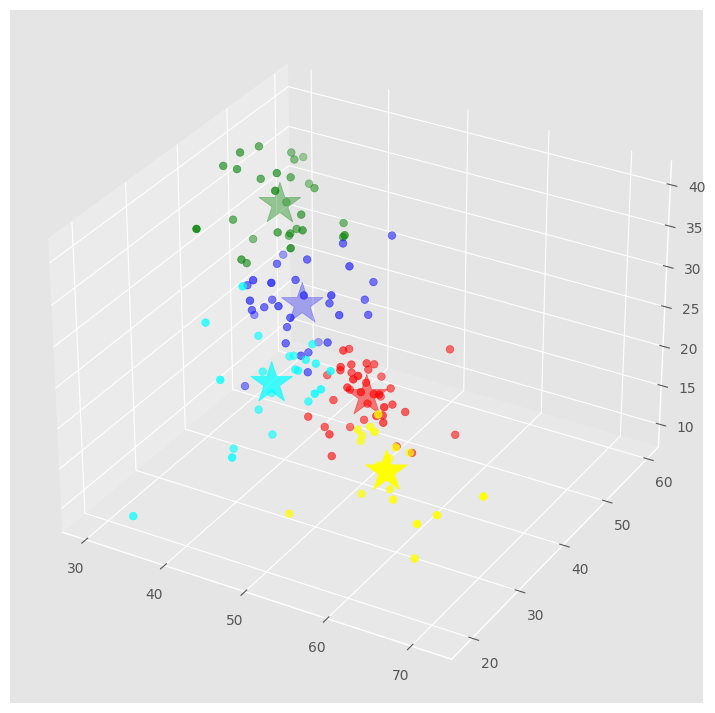

In [51]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=30)
ax1.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

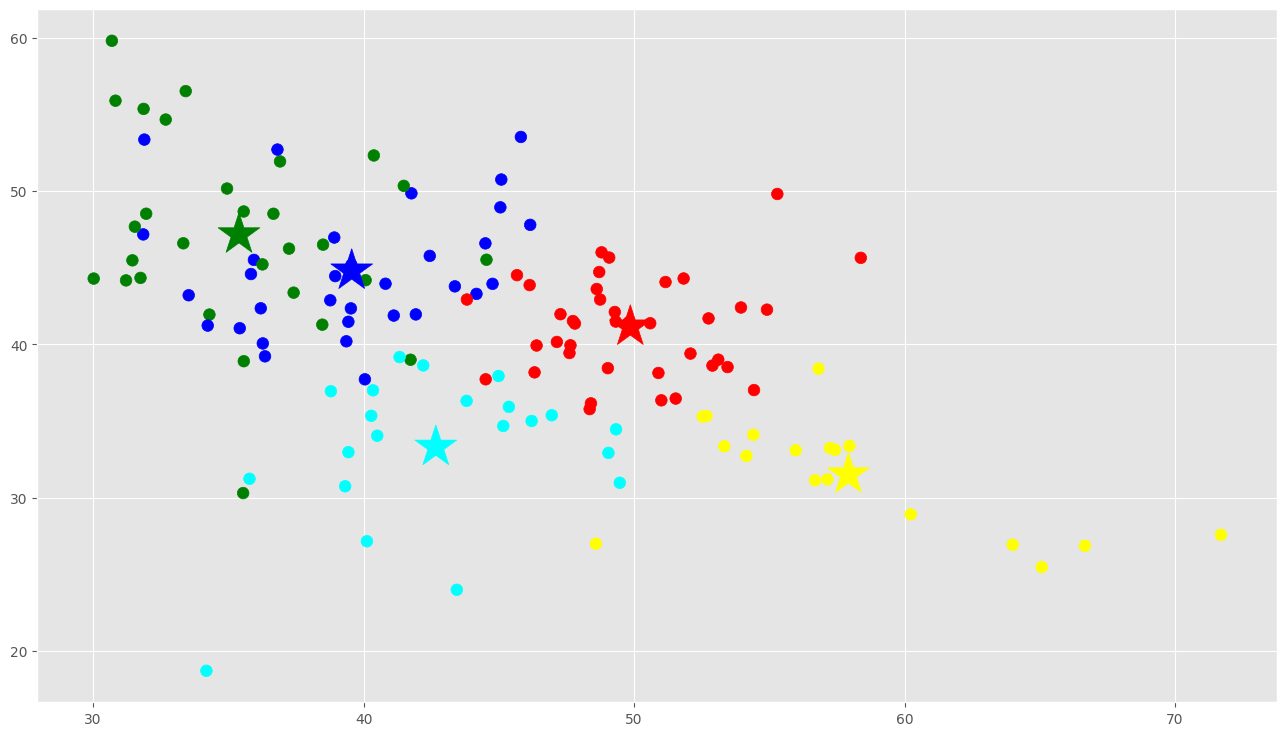

In [52]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

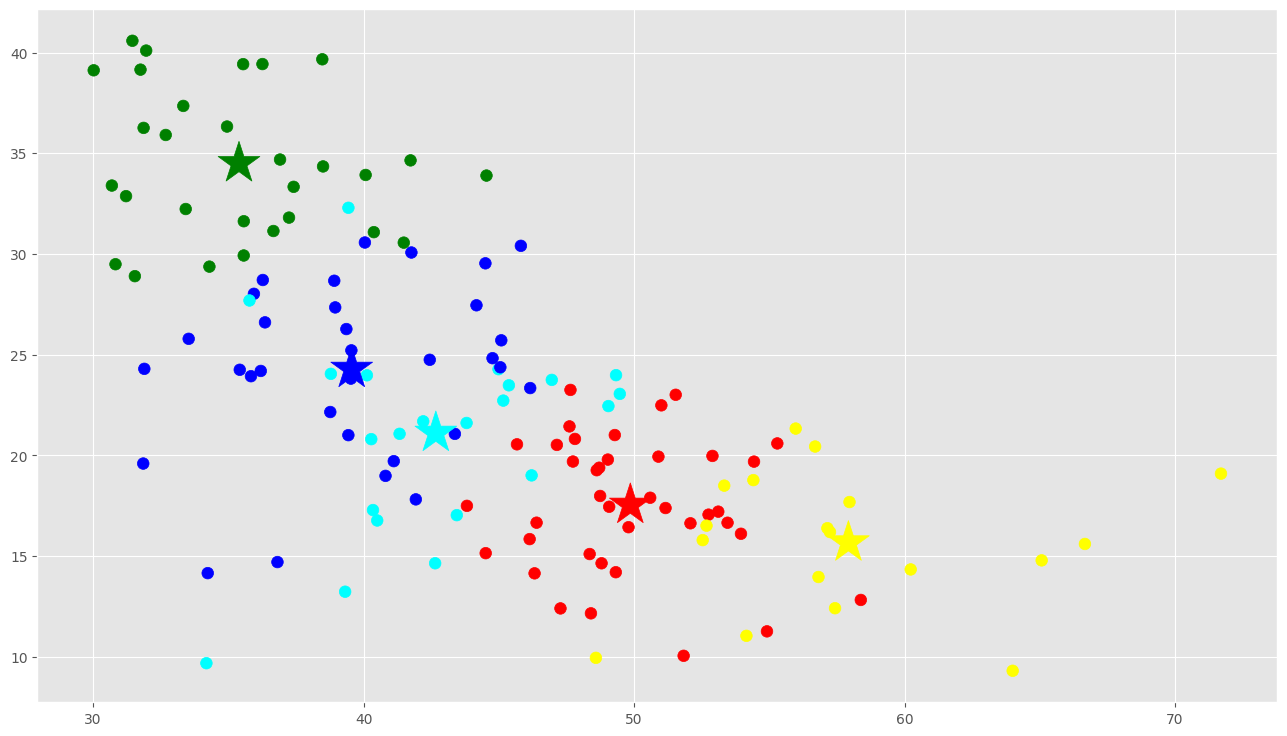

In [54]:
# Hacemos una proyecciÃ³n a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

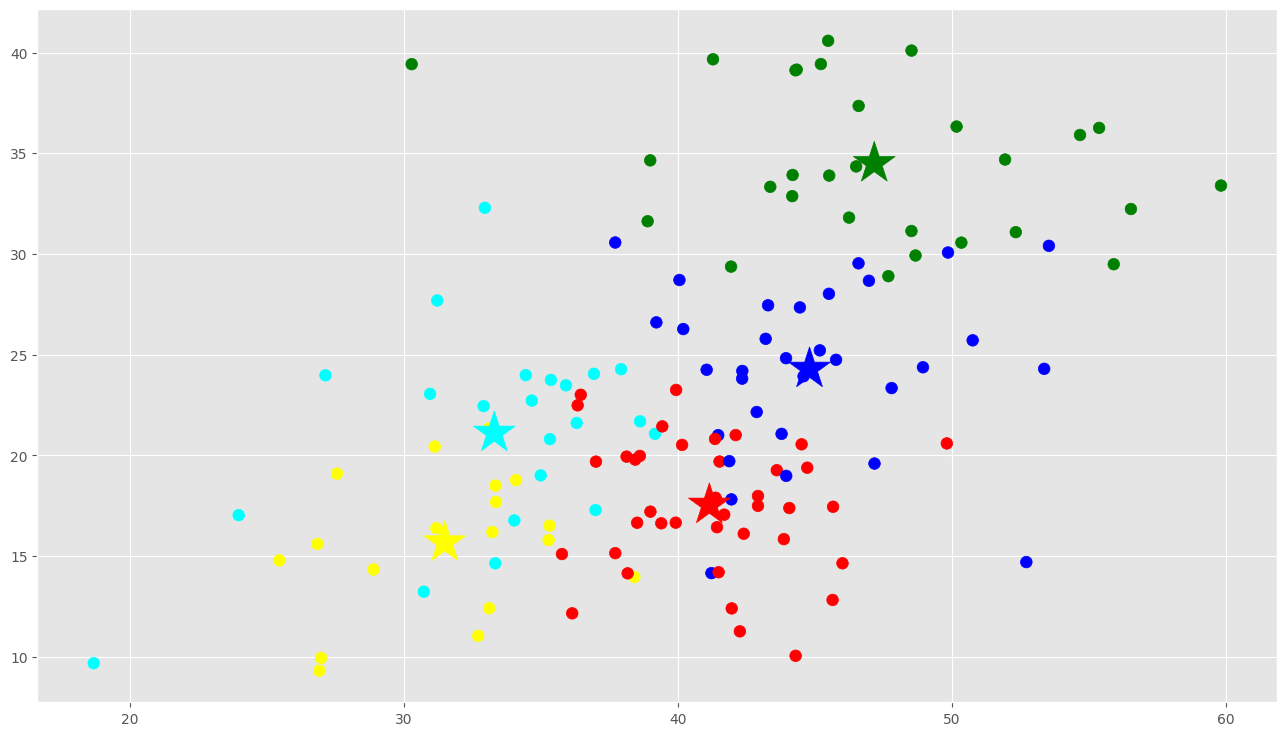

In [55]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [56]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,39
1,green,29
2,blue,32
3,cyan,22
4,yellow,18


In [57]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,10.0
2,2,13.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


In [60]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print(row["usuario"], row["categoria"],row["label"])

AvrilLavigne 2 0
britneyspears 2 0
celinedion 2 0
Courtney 2 0
Fergie 2 0
IamStevenT 2 0
kanyewest 2 0
katyperry 2 0
KidRock 2 0
LennyKravitz 2 0
MariahCarey 2 0
shakira 2 0
taylorswift13 2 0


In [61]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21, 121, 107,  91,  82], dtype=int64)

In [62]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
SerranoIsmael
Pablo_Iglesias_
kobebryant
JudgeJudy


In [64]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print(row["usuario"], row["categoria"],row["label"])

andyroddick 7 0
AngelAlessandra 3 0
AvrilLavigne 2 0
BarRefaeli 3 0
britneyspears 2 0
carmenelectra 3 0
celinedion 2 0
CindyCrawford 3 0
CourteneyCox 1 0
Courtney 2 0
Cristiano 7 0
epunset 6 0
EvaLongoria 3 0
Fergie 2 0
heidiklum 3 0
IamStevenT 2 0
jimlangevin 8 0
jimmyfallon 4 0
justdemi 1 0
kanyewest 2 0
katyperry 2 0
KevinSpacey 1 0
KidRock 2 0
LennyKravitz 2 0
LeoDiCaprio 1 0
MariahCarey 2 0
martinvars 6 0
MelanieGriffith 1 0
MileyCyrus 1 0
Oprah 4 0
PaulaMeliveo 5 0
paulocoelho 9 0
RealHughJackman 1 0
shakira 2 0
taylorswift13 2 0
TheEllenShow 4 0
TheReal_Jlh 1 0
TomCruise 1 0
ZacEfron 1 0


# Clasificación de nuevos registros

In [65]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner mÃ¡s de un array para evaluar a varios usuarios nuevos a la vez

[2]


NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color